## 最终使用的是以下代码：

In [30]:
 # 加载模块
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
from seaborn import colors

plt.style.use('seaborn')
import shap
import matplotlib.ticker as mticker
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.ticker as ticker


plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 8

plt.rcParams['font.family'] = 'Times New Roman'
font = {'family': 'serif',
        'weight': "medium"
        }

# 读取数据，目标变量Geographical_descroptors:Greek_labels是Greek_labels在CCM模型中对Geographical_descroptors的相关系数
xlsx_file = "/Users/yangqianyi/Desktop/decolonization/Greek-labelling-policy-main/5. Uncharted influential features（SHAP）/SHAP data1.xlsx"
data = pd.read_excel(xlsx_file, sheet_name="Sheet1")
# 选择特征
cols=['communist','ICU','woman','conservative(UK)','UK','Emmanuel Macron','native','France','Narendra Modi','China','India',
     'WHO','Joe Biden','muslim','Africa','Donald Trump','rebel','US','maoist','global health','public health','one health'
     
     ,'socialist','republican(US)','democrat(US)','labour(UK)']

cols=['India','France','Africa','US',
      'China','UK','Red Cross','GOP','WHO','UN',
      'left wing','right wing','communist','socialist','republican(US)',
      'democrat(US)','labour(UK)','conservative(UK)','ICU','vaccination','maoist','christian','muslim','islamic',
      'ministry of justice','ministry of health','senate','congress','woman','rebel',
      'native','prime minister','chief','mayor','Xi Jinping','Donald Trump','Joe Biden','Emmanuel Macron',
      'Narendra Modi','Vladimir Putin','global health','public health','one health']
#cols = ['Alpha', 'Beta', 'Gamma', 'Delta','Omicron', 'Epsilon', 'Zeta', 'Eta', 'Theta', 'Iota', 'Kappa', 'Lambda', 'Mu']
# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=150)
#VALUE是小于等于中位数的为0，大于中位数的为1
model.fit(data[cols], data['decolonization in health policy'].values)
# 引用package并且获得解释器explainer
explainer = shap.Explainer(model)
# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer(data[cols])
# print(shap_values.shape)
# print(data[cols])
# 可以确认基线值就是训练集的目标变量的拟合值的均值。
y_base = explainer.expected_value
# print(y_base)
data['pred'] = model.predict(data[cols])
# print(data['pred'].mean())

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


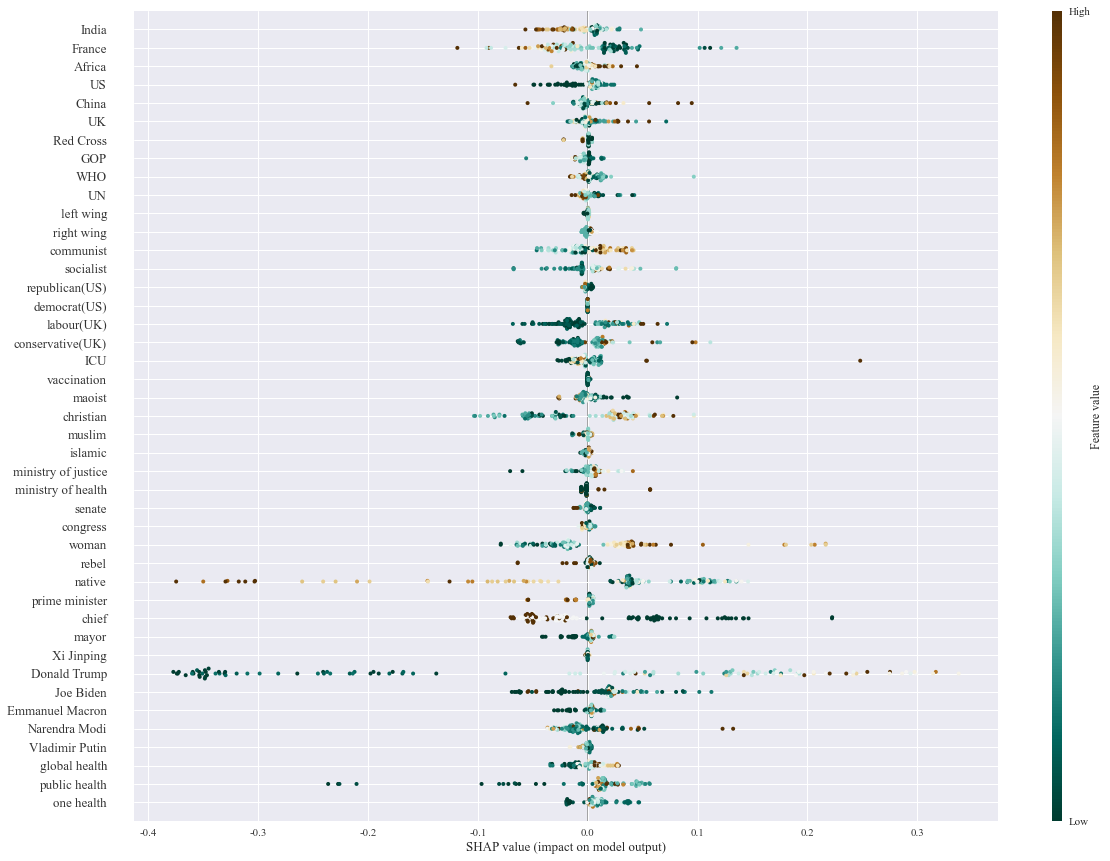

In [31]:
#shap.summary_plot(shap_values,show=True,cmap='BrBG')
shap.summary_plot(shap_values,max_display=60,sort=False,plot_size=[17,12], cmap='BrBG_r')

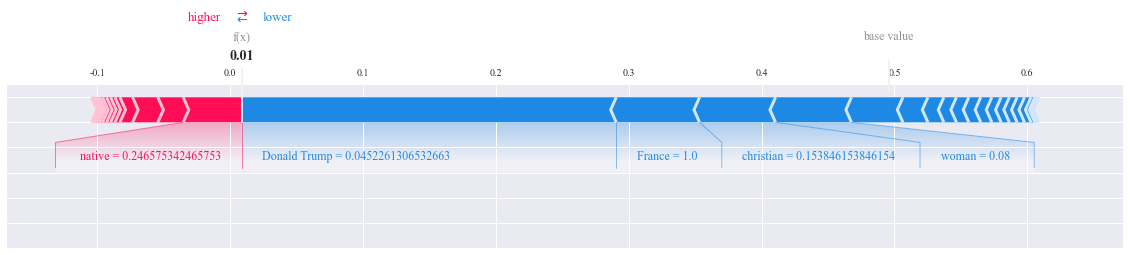

In [37]:
positive_color = "#035f54"
negative_color = "#9b6117"
# Fig2
shap.force_plot(shap_values[116], matplotlib=True,show=False,plot_cmap = [positive_color, negative_color]).savefig('force_plot_300dpi.svg', bbox_inches='tight', dpi=300,) #plot_cmap='RdBu'

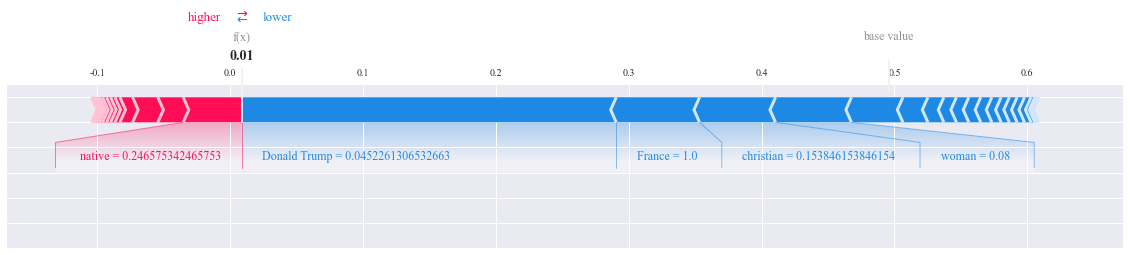

In [36]:
shap.force_plot(shap_values[116], matplotlib=True,show=False, plot_cmap=[positive_color, negative_color]).savefig('force_plot_300dpi.svg', bbox_inches='tight', dpi=300,)


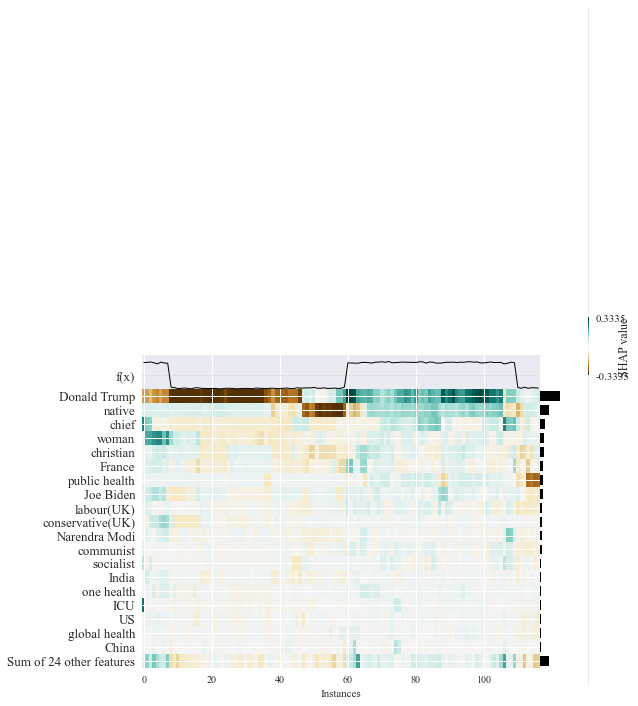

In [32]:
fig=plt.gcf()
shap.plots.heatmap(shap_values,cmap='BrBG',max_display=20,plot_width=8)
fig.savefig('heatmap_300dpi.svg', bbox_inches='tight', dpi=300)

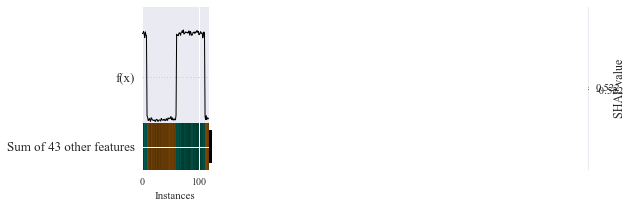

In [25]:
#首行
fig=plt.gcf()
shap.plots.heatmap(shap_values,cmap='BrBG',max_display=1,plot_width=8)
fig.savefig('heatmap_3001dpi.svg', bbox_inches='tight', dpi=300)